In [1]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical
from keras.layers.core import Activation
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path6 = 'Epileptic Seizure Recognition.csv'
figures_path = './figures'

In [3]:
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
if not os.path.exists(figures_path+"/6FP"):
    os.makedirs(figures_path+"/6FP")


In [4]:
Data = pd.read_csv(data_path6)

In [5]:
Data=Data.drop(["Unnamed"],axis=1)

In [6]:
Labels = Data['y'].values
Features = Data.drop(['y'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)


Features shape: (11500, 178)
Labels shape: (11500,)


In [7]:
for i in range(len(Labels)):
  if Labels[i]==2 or Labels[i]==3 or Labels[i]==4 or Labels[i]==5:
    Labels[i]=0
  else:
    Labels[i]=1



In [8]:
Labels

array([0, 1, 0, ..., 0, 0, 0])

In [9]:
LabelDataFrame=pd.DataFrame(Labels)

In [10]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [11]:
LabelDataFrame[0].value_counts()

0    9200
1    2300
Name: 0, dtype: int64

In [12]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        #model.save('modeloEpilepsia.h5')
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_sm, y_sm = sm.fit_resample(Features, Labels)

print(f'''Shape of X before SMOTE: {Features.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (11500, 178)
Shape of X after SMOTE: (18400, 178)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (14720, 178)
Train labels shape: (14720,)
Test data shape: (3680, 178)
Test labels shape: (3680,)


In [15]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(14720, 178)

In [17]:
X_train.shape

(14720, 178)

In [18]:
#classes
classes = [0, 1]

In [19]:
# select classifiers

classifiers=[
DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 2, min_samples_split= 10),#ok
MLPClassifier(activation= 'logistic', hidden_layer_sizes=(100,), learning_rate= 'constant', solver= 'adam'), #ok
KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=1, p=2,weights='uniform'),#ok
SGDClassifier(alpha= 0.001, loss='hinge', max_iter= 2000, penalty= 'l2'),
ExtraTreesClassifier( min_samples_split= 4, n_estimators= 150,random_state=20), #Definitivo
svm.SVC(C= 10, gamma= 'scale', kernel= 'rbf'), #Definitivo
RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 500, random_state=40), #Definitivo
GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 200, random_state= 40), #Definitivo
]
names=['ET', 'SVM', 'RF','GB','DCT', 'MLP', 'KN','SGD']

Train runtime: 2.304732322692871
Test runtime: 0.03047919273376465


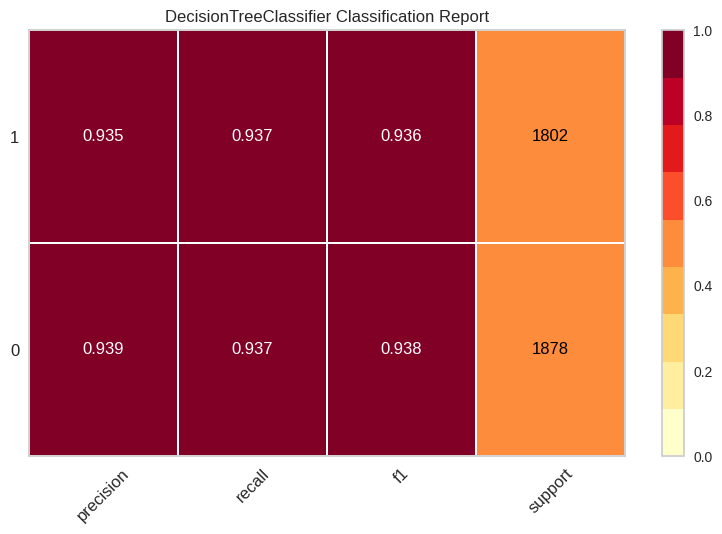

Train runtime: 20.66160750389099
Test runtime: 0.06407642364501953


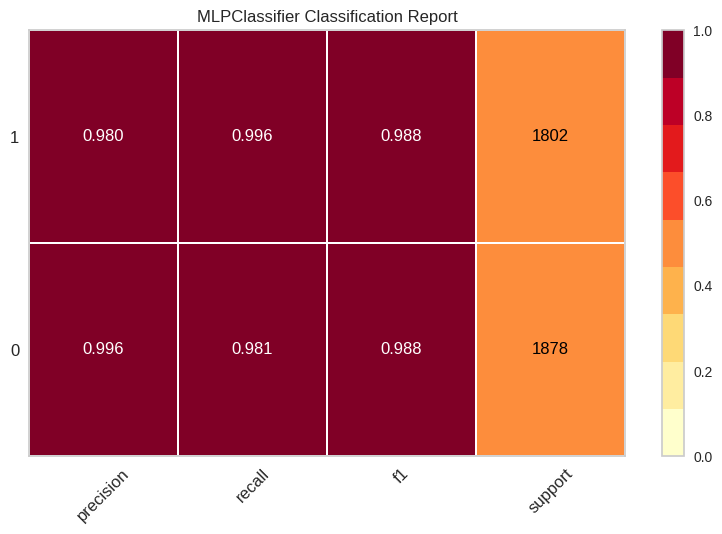

Train runtime: 0.005234956741333008
Test runtime: 1.604309320449829


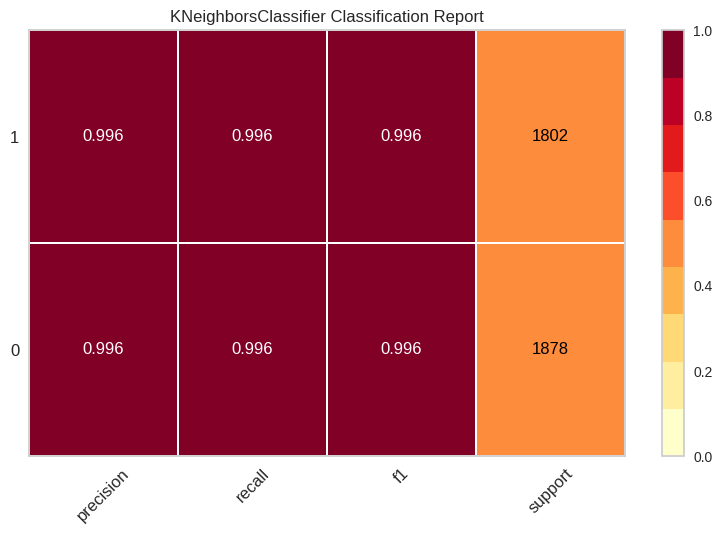

Train runtime: 0.5859160423278809
Test runtime: 0.24692106246948242


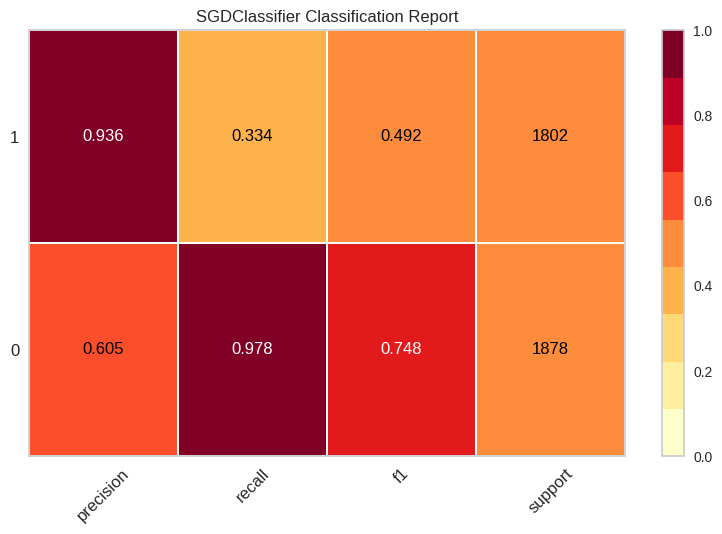

Train runtime: 4.80946159362793
Test runtime: 0.3410980701446533


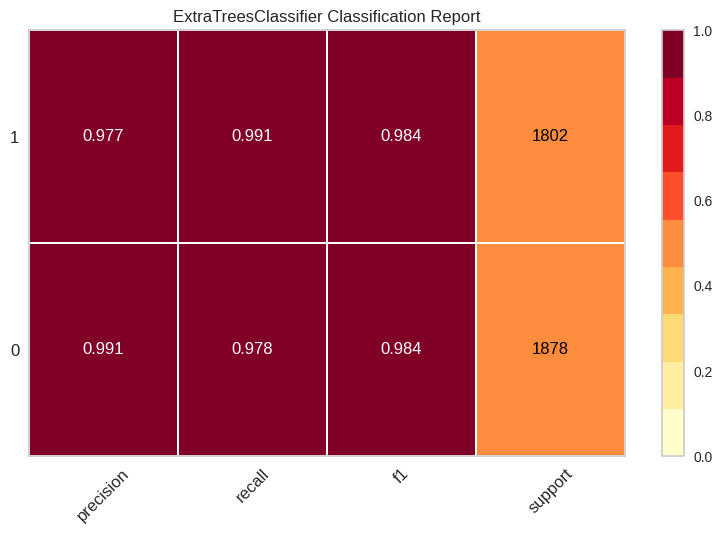

Train runtime: 2.773463249206543
Test runtime: 2.3223507404327393


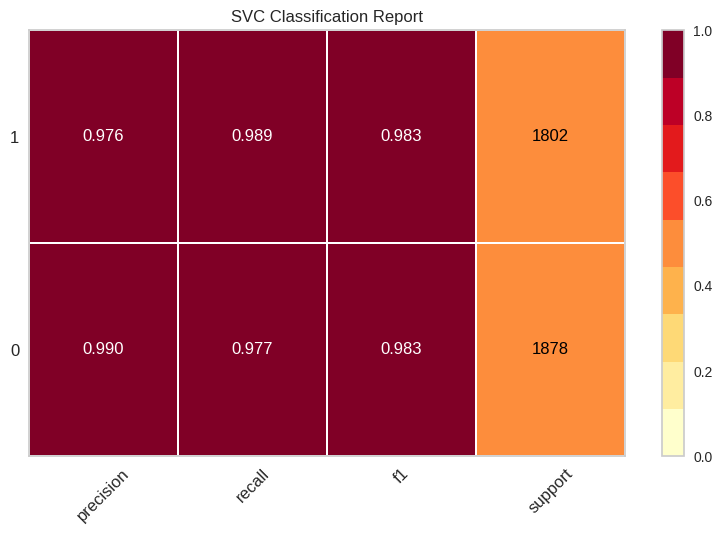

Train runtime: 88.34596753120422
Test runtime: 0.6859016418457031


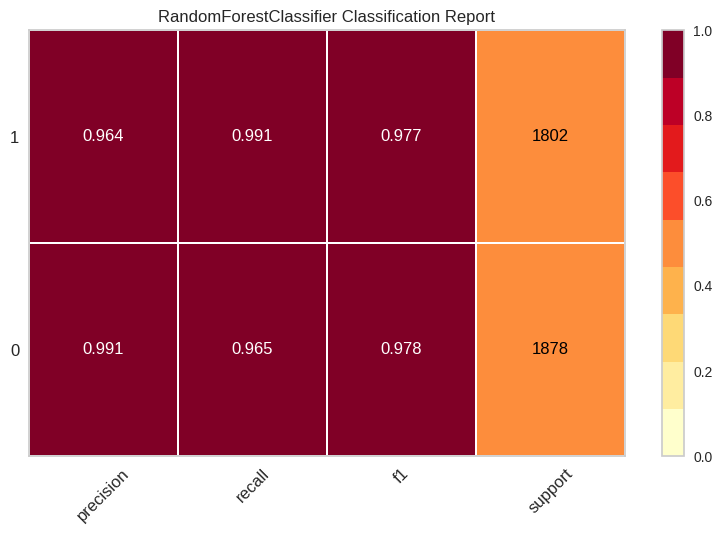

Train runtime: 186.27465844154358
Test runtime: 0.07966327667236328


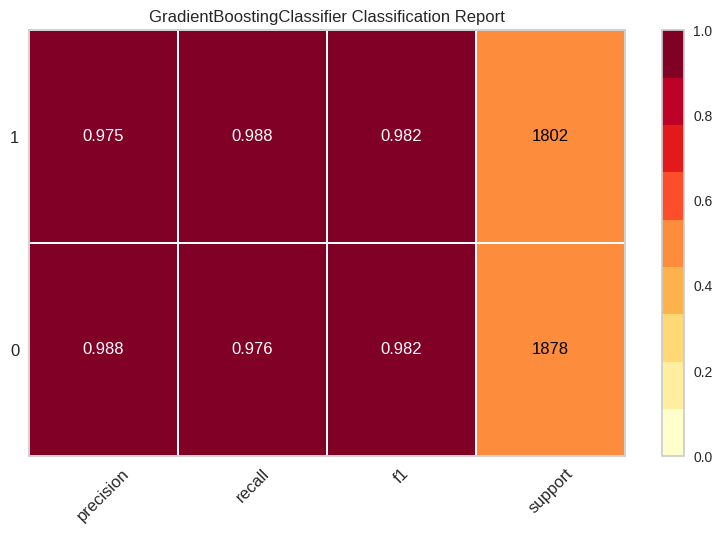

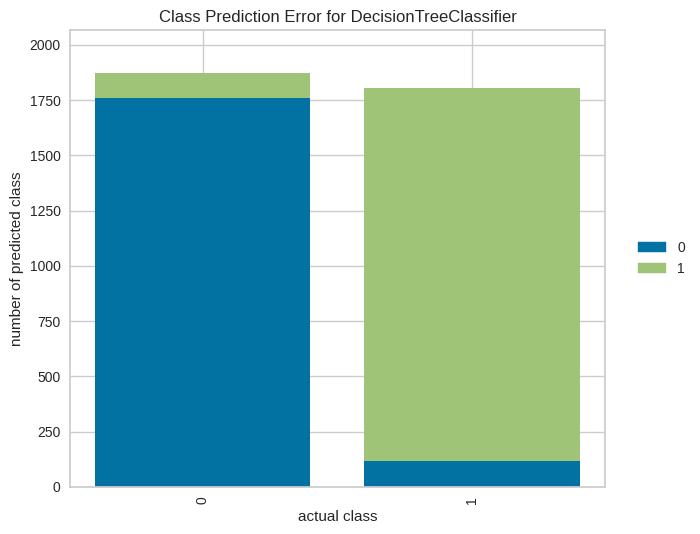

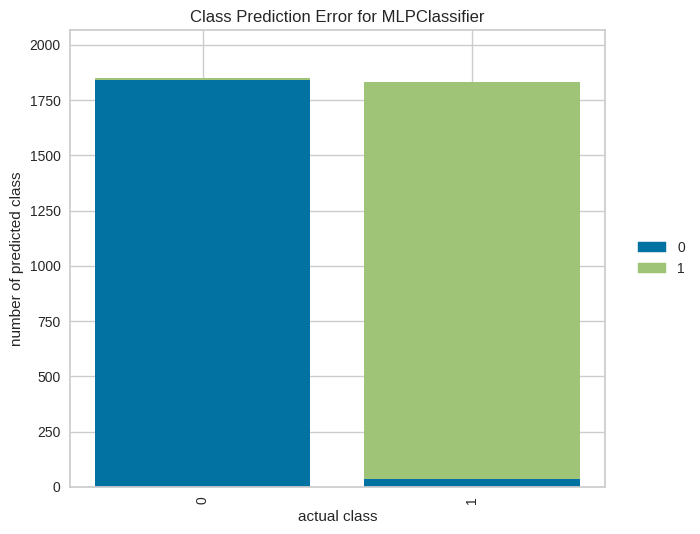

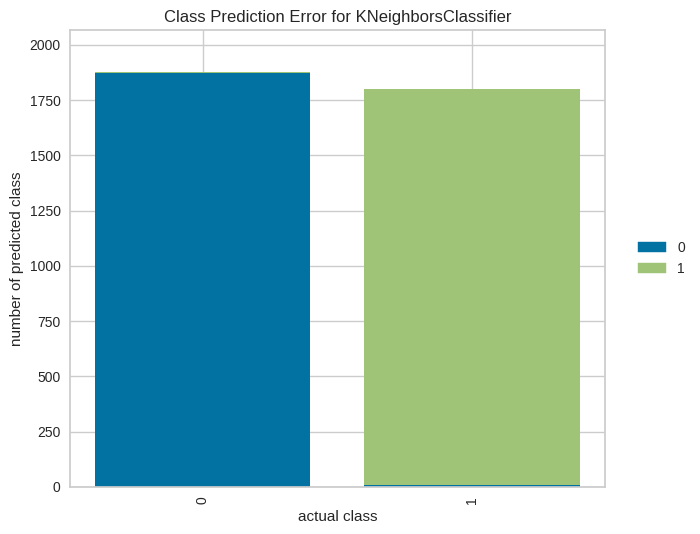

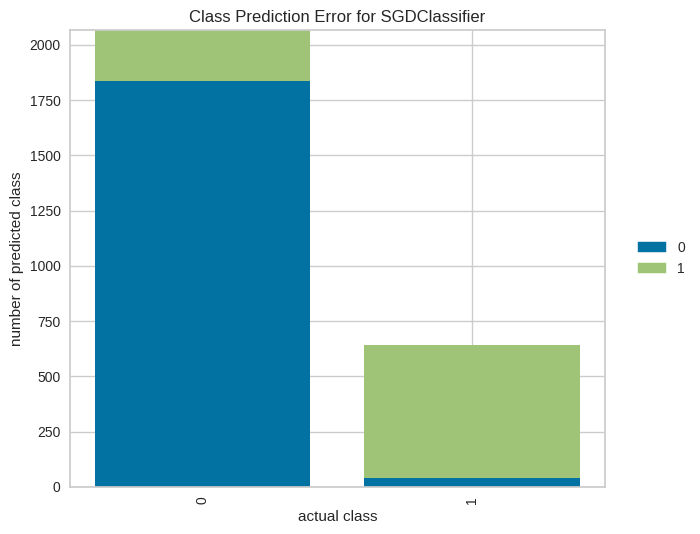

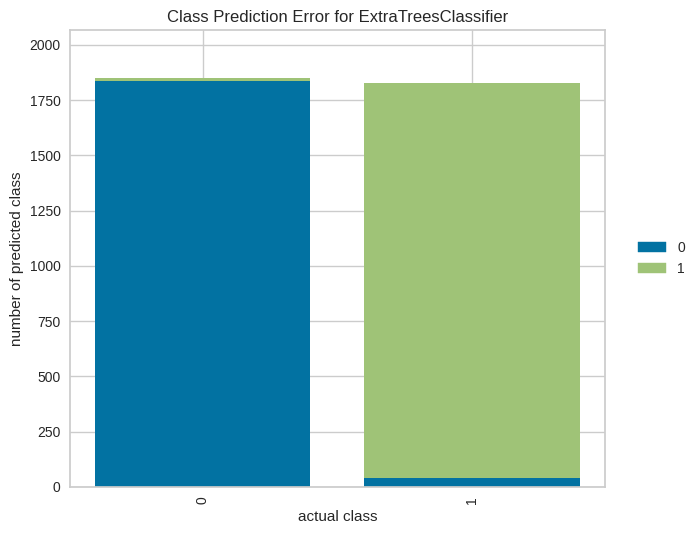

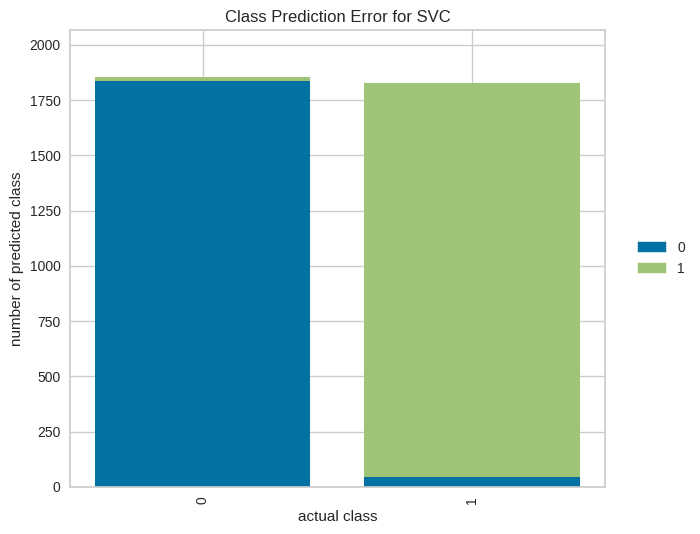

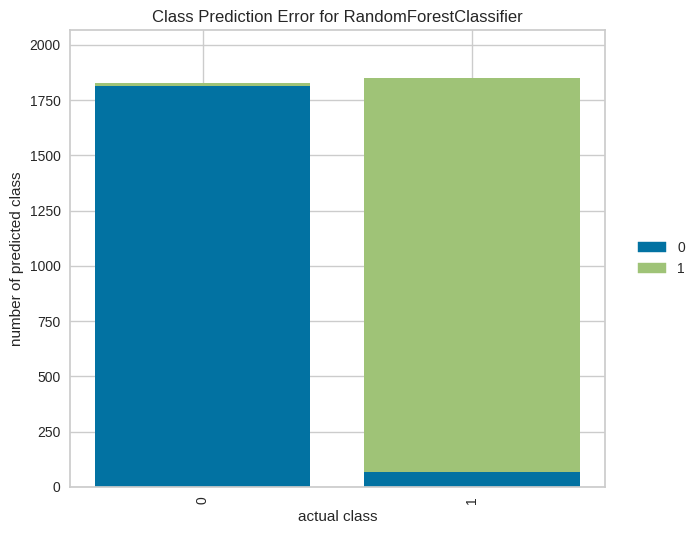

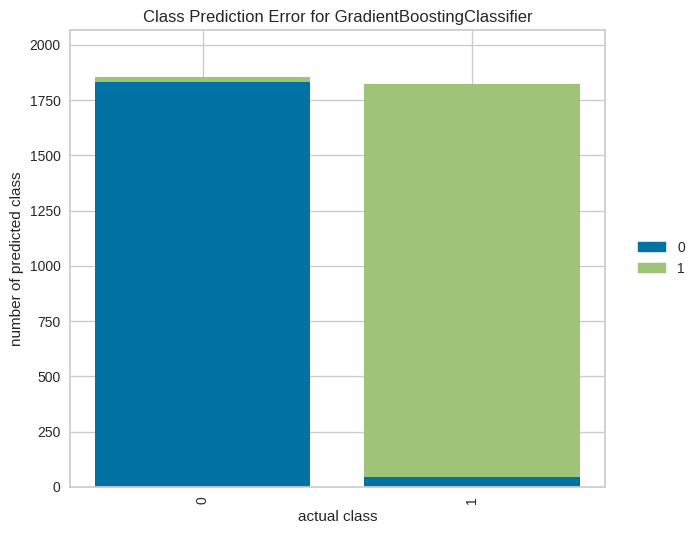

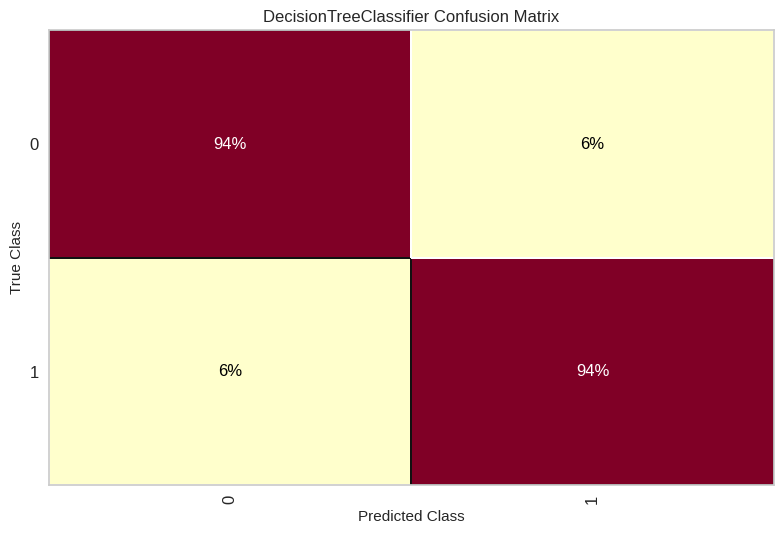

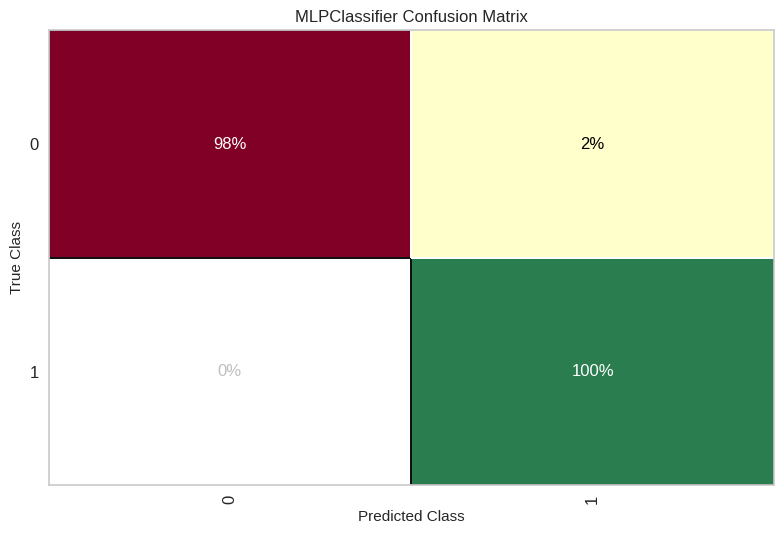

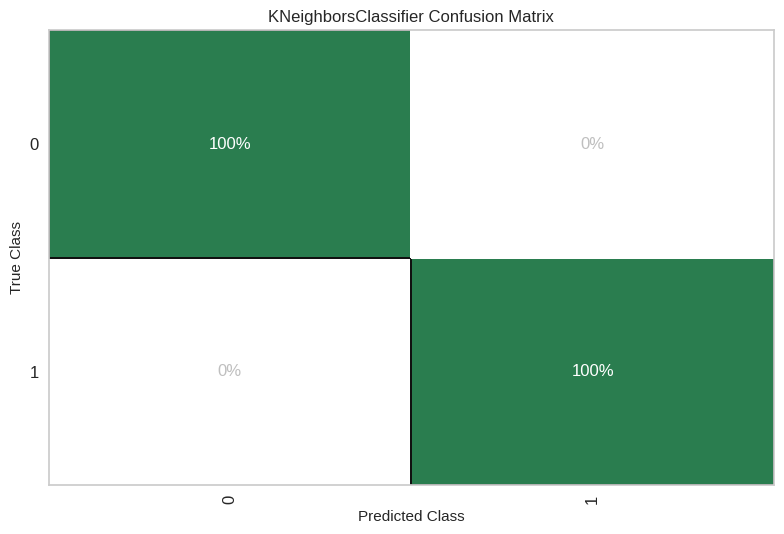

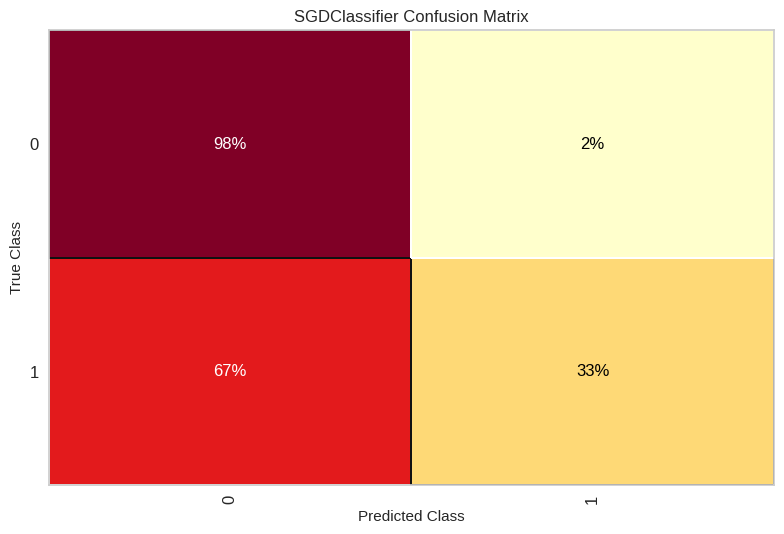

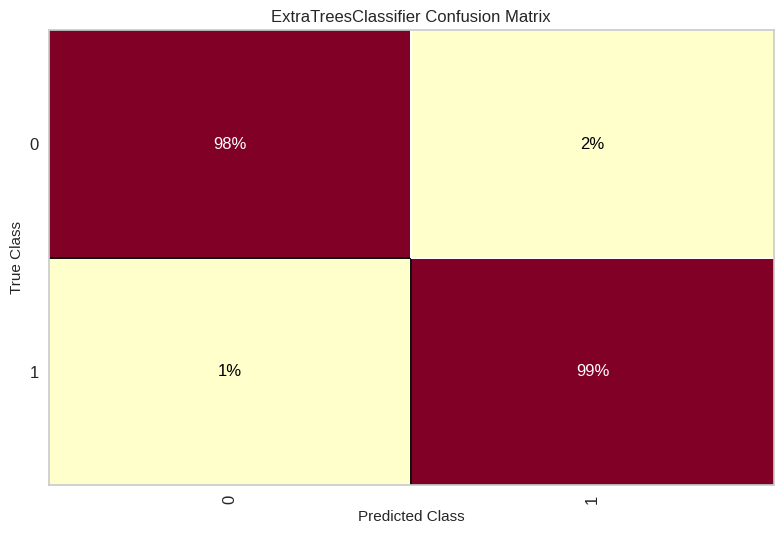

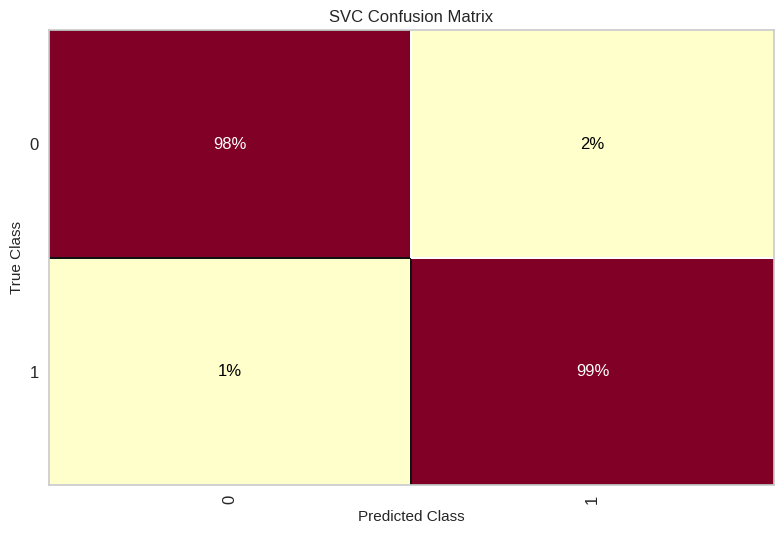

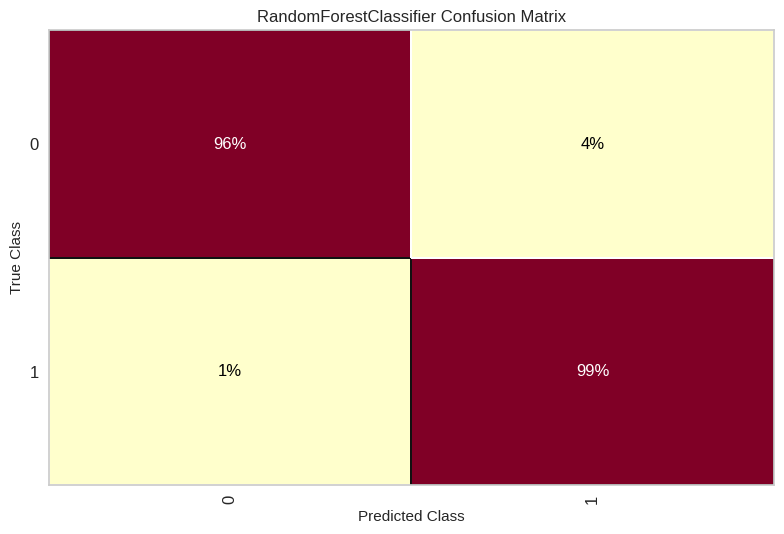

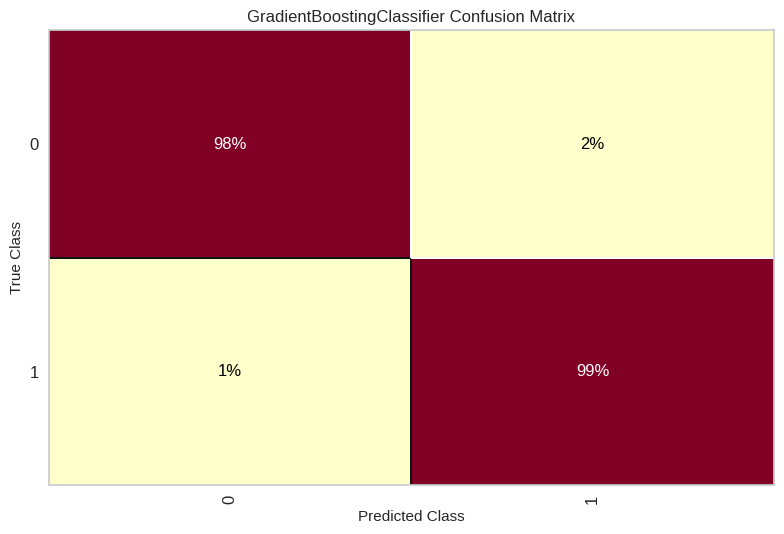

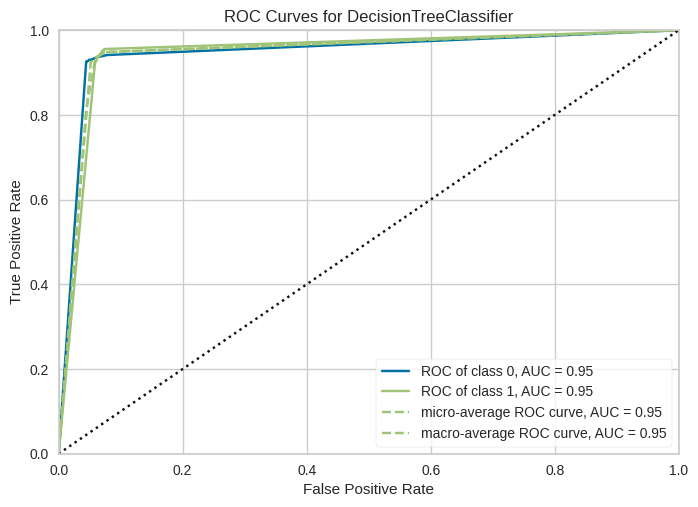

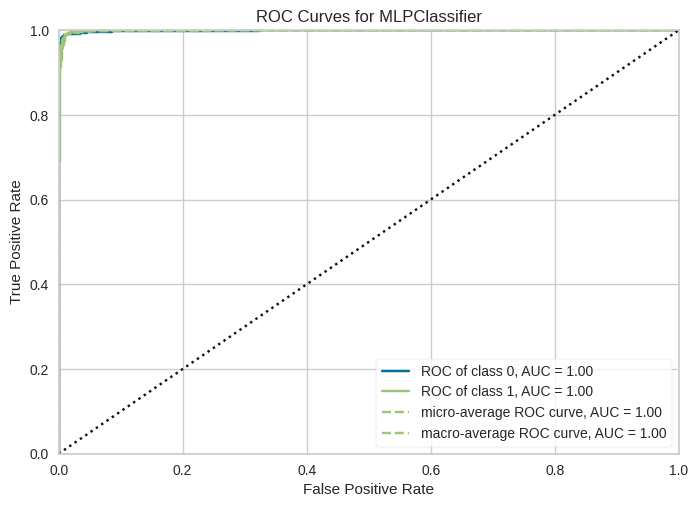

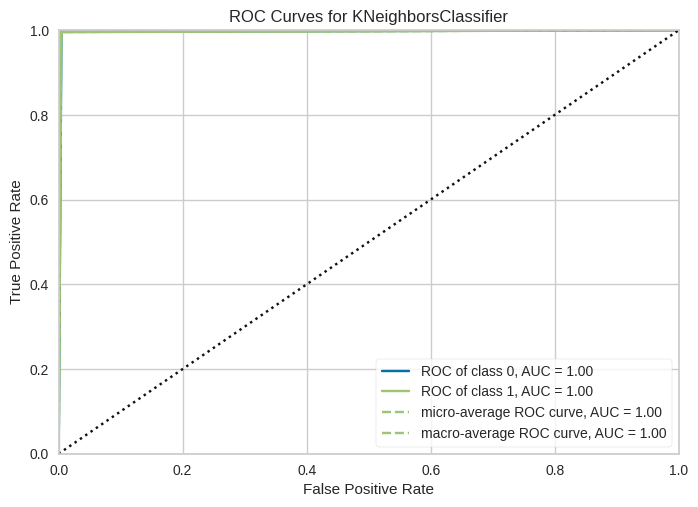

ModelError: ignored

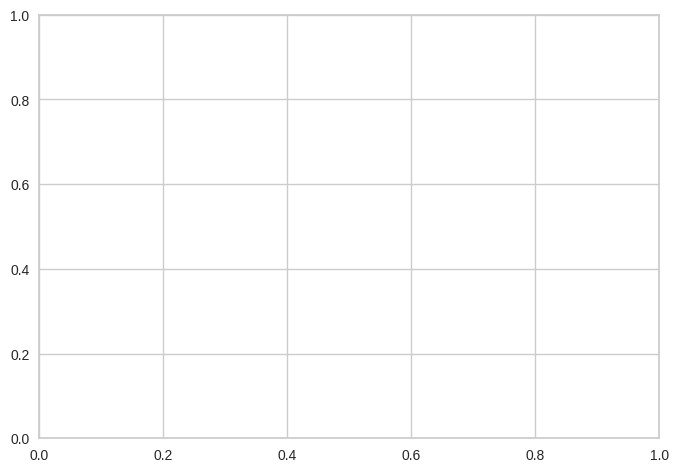

In [20]:
#deploy visualization A
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [21]:
#Deploy aggregate metrics
classifier_metrics()

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10)
accuracy_score: 0.9351
cohen_kappa_score: 0.8701
log_loss: 1.8353
zero_one_loss: 0.0649
hemming_loss: 0.0649
matthews_corrcoef: 0.8701

---------------------------------------------------------------------------------
MLPClassifier(activation='logistic')
accuracy_score: 0.9859
cohen_kappa_score: 0.9717
log_loss: 0.0433
zero_one_loss: 0.0141
hemming_loss: 0.0141
matthews_corrcoef: 0.9719

---------------------------------------------------------------------------------
KNeighborsClassifier(leaf_size=1, n_neighbors=1)
accuracy_score: 0.9959
cohen_kappa_score: 0.9918
log_loss: 0.1469
zero_one_loss: 0.0041
hemming_loss: 0.0041
matthews_corrcoef: 0.9918

---------------------------------------------------------------------------------
SGDClassifier(alpha=0.001, max_iter=2000)
accuracy_score: 0.6690
cohen_kappa_score: 0.3290
log_loss: 0.0000
zero_one_loss: 0.3310
hemming_loss: 0.3310
